Imported all libraries needed

In [ ]:
import pandas as pd
import datetime as dt
import time
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Imported the csv file called city_date

In [38]:
data=pd.read_csv("city_data.csv",sep="|",header=1)
data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


`QUESTION 1`

We check to see how many missing values are there in the dataset

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In the column "Average Price Groceries" only 6 of the rows contain entries, the rest are null.

Regarding the rest of the columns there are only a few missing values, so we decided to fill the missing values with "Unkown".

In [40]:
for col in data.columns:
  data[col]=data[col].fillna("Unknown")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               86 non-null     object 
 2   Population                       86 non-null     int64  
 3   Working Age Population           86 non-null     object 
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                86 non-null     object 
 6   GDP per Capita                   86 non-null     object 
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            86 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

We check to see how many duplicate values there are in the data set

In [42]:
duplicate_indexes=data.index[data["City"].duplicated(keep=False)]
data.loc[duplicate_indexes]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,Unknown,2023-06-29 00:00:00
16,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,Unknown,2023-06-29 00:00:00
32,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,Unknown,2023-11-27 00:00:00
33,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,Unknown,2023-11-27 00:00:00


As we can see "Berlin, Germany" and "Malaga, Spain" appear twice in the data set, which is not usefull, so we remove this duplicates.

In [43]:
data=data.drop([16,33])
data=data.reset_index(drop=True)
data.loc[duplicate_indexes]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,Unknown,2023-06-29 00:00:00
16,"Hamburg, Germany",461.0,3315036,2181857.0,21.5,3.2,61058.0,0,"German, English, Turkish",3500,1100,2100,Unknown,2024-07-10 00:00:00
32,"Tallinn, Estonia",2469.0,390860,253977.0,26.9,3.5,49329.0,0,"Estonian, Russian, English",1700,700,1600,Unknown,2023-08-23 00:00:00
33,"Helsinki, Finland",322.0,1507140,1004835.0,25.1,6.6,59502.0,0,"Finnish, Swedish, English",3900,1050,2050,Unknown,2023-09-12 00:00:00


As seen, the duplicate rows are no longer in the set.

`QUESTION 2`

To start working on question 2, we decided to create another dataset with two new columns, one of them being country only and the other being the city only, so we better work with the dataset, while keeping the original.


In [44]:
data_new = data.copy()
data_new["City Only"]=data["City"].str.split(",").str[0].str.strip()
data_new["Country"]=data["City"].str.split(",").str[1].str.strip()
data_new.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update,City Only,Country
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00,Vienna,Austria
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,Unknown,2023-11-03 00:00:00,Salzburg,Austria
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,Unknown,2023-04-22 00:00:00,Brussels,Belgium
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,Unknown,2024-08-09 00:00:00,Antwerp,Belgium
4,"Gent, Belgium",552.0,645813,417832.0,24.8,Unknown,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00,Gent,Belgium


As the method we used only works if "City" column entries are in the form "City, Country", we will check to see if any of the countries is in the column "City Only".

In [46]:
repeated_cities=[]
for country in data_new["Country"].value_counts().index:
    for idx in data_new.index:
        if country==data_new["City Only"].loc[idx]:
            repeated_cities.append(idx)

data.loc[repeated_cities]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
43,"Greece, Athens",1829.0,3530371,2287174.0,22.0,17.2,38580.0,17,"Greek, English",1050,600,1200,Unknown,2024-07-16 00:00:00
58,"Luxembourg, Luxembourg",236.0,610825,424824.0,23.1,5.6,112143.0,2,"Luxembourgish, French, German, English",4200,2100,3300,Unknown,2024-11-29 00:00:00
60,"Malta, Malta",1845.0,456490,309610.0,20.2,3.7,44781.0,0,"Maltese, English",1450,1000,1400,Unknown,2024-02-28 00:00:00


Note: This solution only works if the "City" country is already in the column "Country". If there was only one city from a country, and it was written inversed this apporach would not work. Other possible solution would be checking manually, one by one.

Of the 3 rows we get, only "Greece, Athens" is actually written inverse (the others just happen to have the same city and country name), so we will change it.

In [47]:
data.loc[43, "City"]="Athens, Greece"
data_new.loc[43, "City"]="Athens, Greece"
data_new.loc[43, "City Only"]="Athens"
data_new.loc[43, "Country"]="Greece"
data.loc[43]

City                                    Athens, Greece
Population Density                              1829.0
Population                                     3530371
Working Age Population                       2287174.0
Youth Dependency Ratio                            22.0
Unemployment Rate                                 17.2
GDP per Capita                                 38580.0
Days of very strong heat stress                     17
Main Spoken Languages                   Greek, English
Average Monthly Salary                            1050
Avgerage Rent Price                                600
Average Cost of Living                            1200
Average Price Groceries                        Unknown
Last Data Update                   2024-07-16 00:00:00
Name: 43, dtype: object

`a)`  Which country appears most frequently in the dataset? How many cities are
associated with it?


In [50]:
max_country_name=data_new["Country"].value_counts().idxmax()
max_cities_number=data_new["Country"].value_counts().max()
max_cities_name=data_new[data_new["Country"]==max_country_name]["City Only"].tolist()

print(f"The country that appears more times is {max_country_name}, with {max_cities_number} cities associated: {max_cities_name}")

The country that appears more times is Germany, with 9 cities associated: ['Hamburg', 'Munich', 'Cologne', 'Frankfurt am Main', 'Stuttgart', 'Leipzig', 'Dresden', 'Dusseldorf', 'Hanover']


`b)`  How many cities are present in total? How many are associated with Greece?

In [58]:
cities_number=data_new.shape[0]
greece_cities_number=data_new["Country"].value_counts()["Greece"]
greece_cities_name=data_new[data_new["Country"]=="Greece"]["City Only"].tolist()

print(f"There are {cities_number} cities present in the data frame, {greece_cities_number} of them are from Greece, accordingly: {greece_cities_name}")

There are 84 cities present in the data frame, 2 of them are from Greece, accordingly: ['Athens', 'Thessaloniki']


`c)` Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

In [ ]:
languages_number=data_new["Main Spoken Languages"].str.split(',').explode().str.strip().value_counts()
min_count = languages_number.min()
least_spoken = languages_number[languages_number==min_count].index.tolist()
top3 = languages_number.nlargest(4).index.tolist()

print(f"The least spoken languages are {least_spoken}")
print(f"The top ones are {top3}")

The least spoken languages are ['Bengali', 'Scots', 'Scots Gaelic', 'Estonian', 'Spanish;Valencian', 'Luxembourgish', 'Latvian', 'Maltese', 'Catalan', 'Serbian', 'Romanian', 'Slovak', 'Slovene']
The top ones are ['English', 'German', 'Turkish', 'French']


Note: As there is a tie in least spoken languages we used <span style="color:lightblue">languages_number[languages_number == min_count].index.tolist()</span> instead of just <span style="color:lightblue">languages_number.idxmin()</span>, this way we make sure that all languages spoken in only 1 place appear in the least spoken list. For the top 3 languages we just manually checked (printing <span style="color:lightblue">data_new["Main Spoken Languages"].str.split(',').explode().str.strip().value_counts() </span>) that there was a tie in the 3rd place, and then selected the first 4 languages appearing.

`QUESTION 3`

In [ ]:
data_new["Last Data Update"]=pd.to_datetime(data_new["Last Data Update"])

`a)` Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [ ]:
april_2023=dt.datetime(year = 2023, month = 4, day = 1)
data_before_2023=data_new[data_new["Last Data Update"]<april_2023]["City"].tolist()

print(f"The cities which would require an update are {data_before_2023}")

The cities which would require an update are ['Basel, Switzerland', 'Munich, Germany', 'Frankfurt am Main, Germany', 'Lyon,  France', 'Venice, Italy', 'Gothenburg, Sweden']


`b)` How many days ago was the last update? On what day, month, and year did it occur?

In [74]:
most_recent=data_new["Last Data Update"].max()
today=pd.Timestamp.today()
time_range=today-most_recent

print(f"The last update was on {most_recent}, {time_range} ago")

The last update was on 2024-12-12 00:00:00, 342 days 17:31:49.343820 ago


`QUESTION 4`

`a)` How are the Unemployment Rate and GDP per Capita distributed and related? 
      What does this relationship suggest? 
      Provide a visual representation.

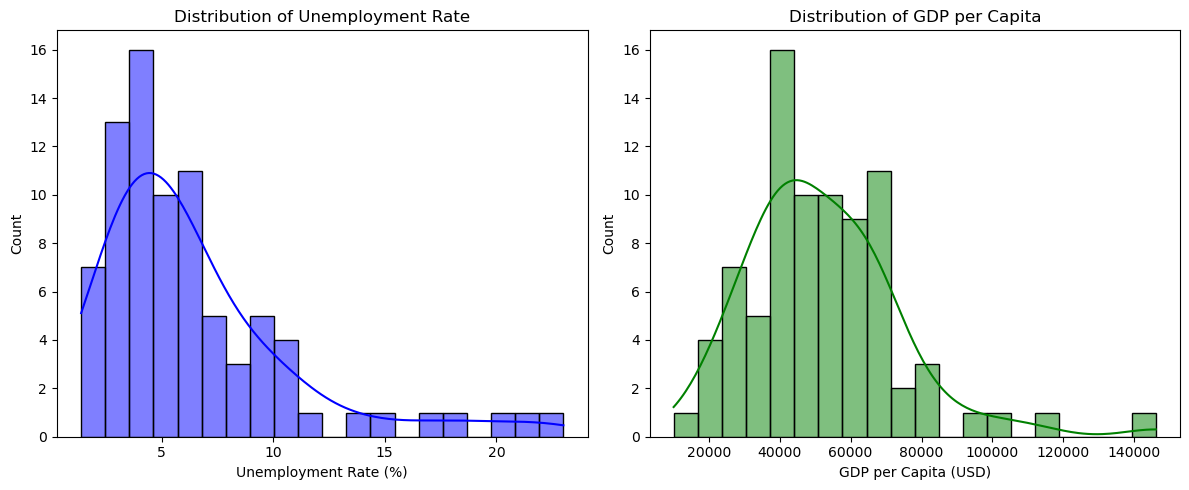

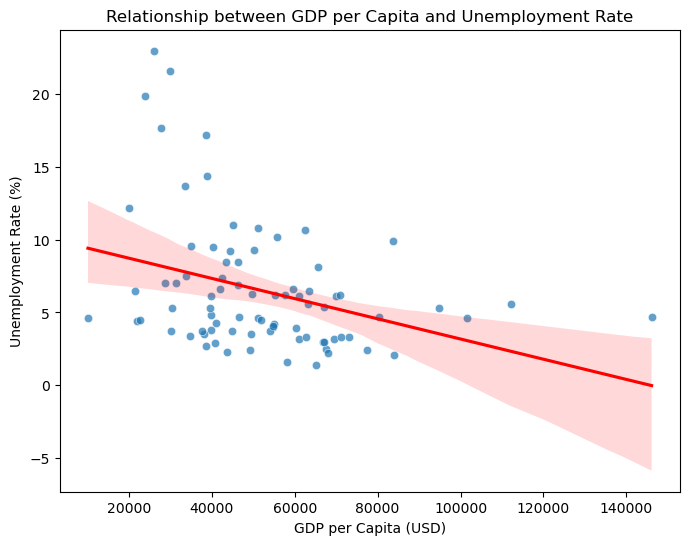

Correlation between GDP per Capita and Unemployment Rate: -0.340


In [ ]:
# Replace "Unknown" and other non-numeric entries with NaN
data_new["Unemployment Rate"] = pd.to_numeric(data_new["Unemployment Rate"], errors="coerce")

# Optional: Clean GDP too, if needed
data_new["GDP per Capita"] = pd.to_numeric(data_new["GDP per Capita"], errors="coerce")

# Create a clean subset for plotting
data_clean = data_new.dropna(subset=["Unemployment Rate", "GDP per Capita"])


# Distribution plots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data_clean["Unemployment Rate"], bins=20, kde=True, color="b")
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")

plt.subplot(1,2,2)
sns.histplot(data_clean["GDP per Capita"], bins=20, kde=True, color="g")
plt.title("Distribution of GDP per Capita")
plt.xlabel("GDP per Capita (USD)")

plt.tight_layout()
plt.show()

# Relationship plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_clean, x="GDP per Capita", y="Unemployment Rate", alpha=0.7)
sns.regplot(data=data_clean, x="GDP per Capita", y="Unemployment Rate", scatter=False, color="red")

plt.title("Relationship between GDP per Capita and Unemployment Rate")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

corr = data_clean["GDP per Capita"].corr(data_clean["Unemployment Rate"])
print(f"Correlation between GDP per Capita and Unemployment Rate: {corr:.3f}")


A correlation of -0.34 between GDP per Capita and Unemployment Rate suggests a weak negative relationship, as GDP per Capita increases, the Unemployment Rate tends to decrease slightly. The relationship is not very strong, so while richer countries tend to have slightly lower unemployment, there are many exceptions.

Higher GDP per Capita might indicate a healthier economy, which can create more jobs and reduce unemployment. But because the correlation is only -0.34, other external factors play a big role in unemployment.

So we conclude taht richer countries tend to have lower unemployment, but the effect is moderate/weak.

`b)` Which are the top 5 cities with the largest difference between the Average
            Monthly Salary and Average Cost of Living? 
            What about the top 5 countries with the smallest average difference? 
            Show these results with meaningful visualizations.

In [81]:
data_new["Salary - Living Cost"]=data_new["Average Monthly Salary"]-data_new["Average Cost of Living"]
top5=data_new.sort_values("Salary - Living Cost", ascending=False)["City"].iloc[:5].tolist()
bottom5=data_new.groupby("Country")["Salary - Living Cost"].mean().nsmallest(5).index.tolist()

print(f"The top 5 cities with the largest difference are {top5} while the countries with the smallest difference are {bottom5}")

The top 5 cities with the largest difference are ['Basel, Switzerland', 'Tampere, Finland', 'Helsinki, Finland', 'Zurich, Switzerland', 'Geneva, Switzerland'] while the countries with the smallest difference are ['Portugal', 'Greece', 'Slovak Republic', 'Turkiye', 'Poland']


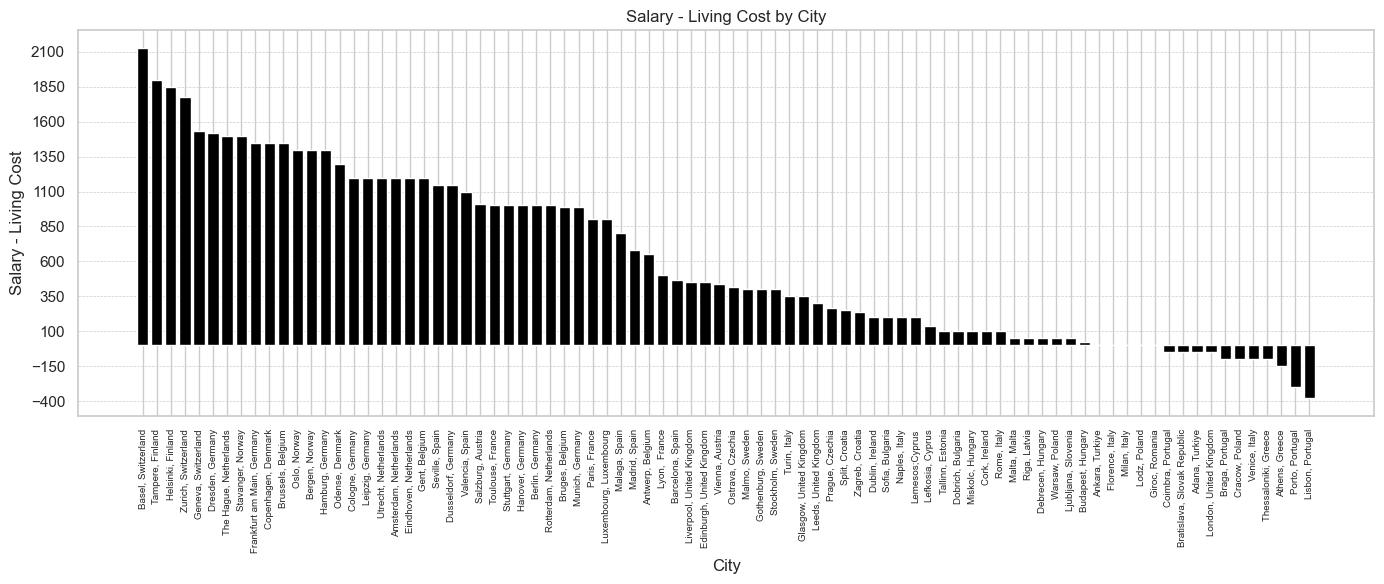

In [ ]:

# sort data
sorted_difference_city = data_new.sort_values("Salary - Living Cost", ascending=False)

# unique colors



plt.figure(figsize=(14, 6))
plt.bar(sorted_difference_city["City"], sorted_difference_city["Salary - Living Cost"], color="black")

# y-axis tick interval (change 500 or 100 depending on your data range)
y_min = -400
y_max = 2150

plt.yticks(np.arange(y_min, y_max + 1, 250))  # set interval to 100

plt.xlabel("City")
plt.ylabel("Salary - Living Cost")
plt.title("Salary - Living Cost by City")

plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.gca().set_axisbelow(True)

plt.show()

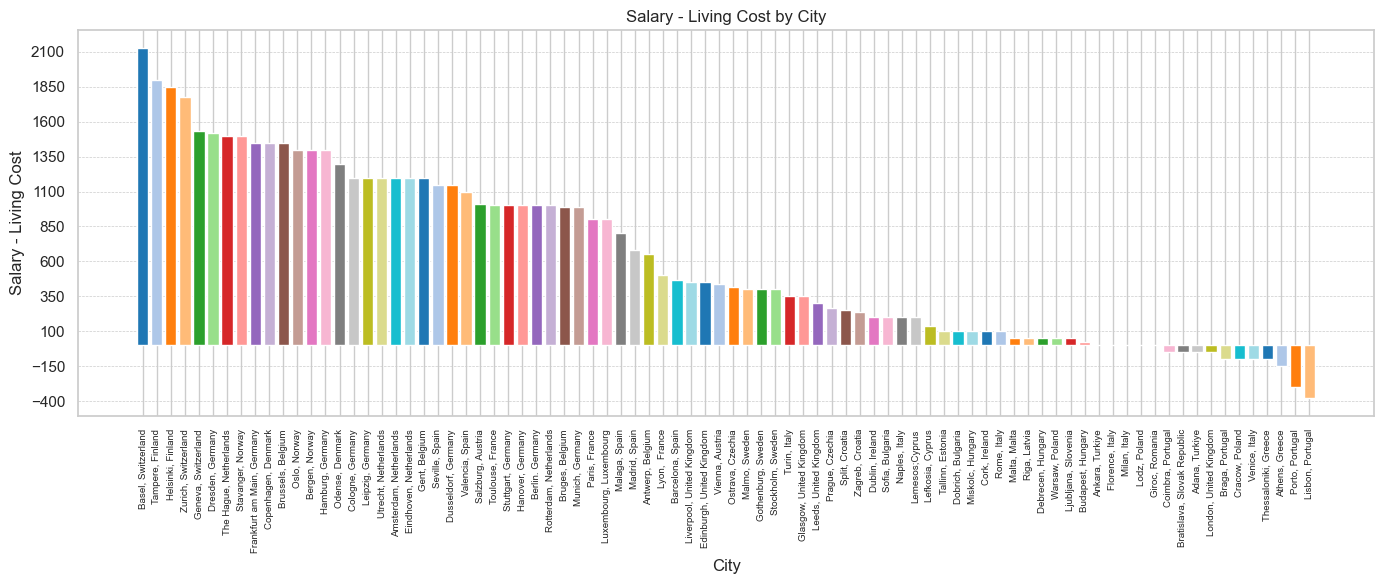

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sort data
sorted_data = data_new.sort_values("Salary - Living Cost", ascending=False)

# Set Seaborn style for clean visuals
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
bars = plt.bar(sorted_data["City"], sorted_data["Salary - Living Cost"], color=sns.color_palette("tab20", len(sorted_data)))

# y-axis tick interval
y_min = -400
y_max = 2150
plt.yticks(np.arange(y_min, y_max + 1, 250))

plt.xlabel("City")
plt.ylabel("Salary - Living Cost")
plt.title("Salary - Living Cost by City")

plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()

# Grid behind the bars
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.gca().set_axisbelow(True)

plt.show()


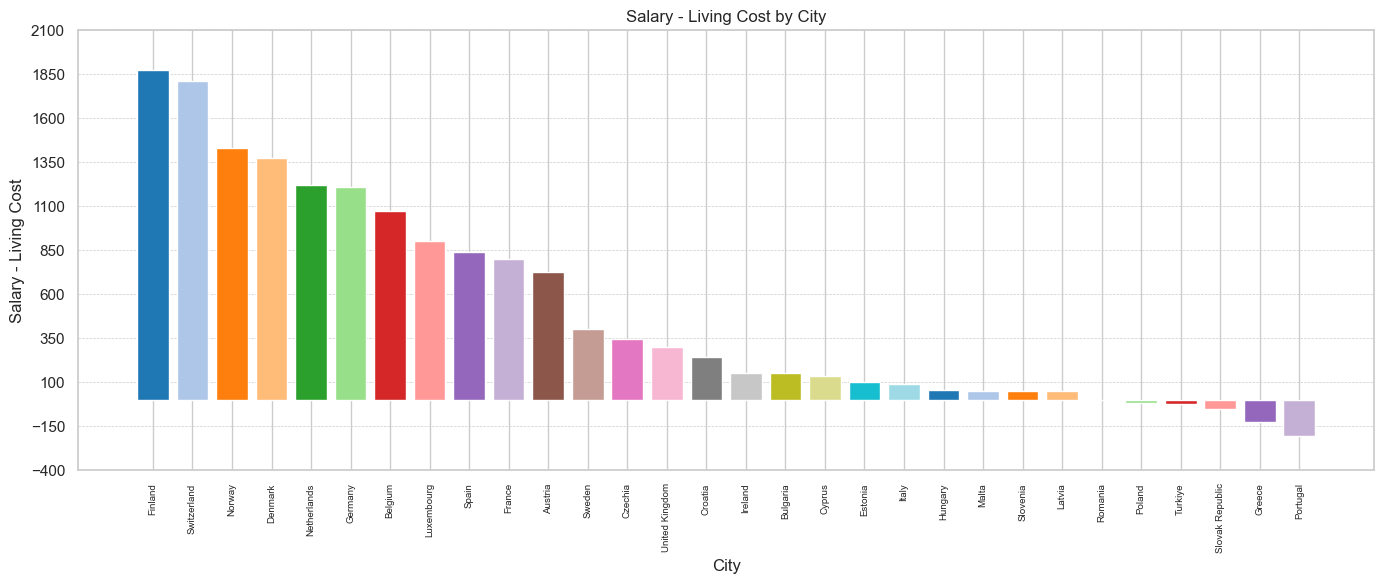

In [95]:
sorted_difference_countries=data_new.groupby("Country")["Salary - Living Cost"].mean().sort_values(ascending=False)

# Set Seaborn style for clean visuals
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
bars = plt.bar(sorted_difference_countries.index, sorted_difference_countries, color=sns.color_palette("tab20", len(sorted_data)))

# y-axis tick interval
y_min = -400
y_max = 2150
plt.yticks(np.arange(y_min, y_max + 1, 250))

plt.xlabel("City")
plt.ylabel("Salary - Living Cost")
plt.title("Salary - Living Cost by City")

plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()

# Grid behind the bars
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.gca().set_axisbelow(True)

plt.show()


`c)` Which is the best city for someone seeking:
an average monthly salary above €2000,
a cost of living below or equal to €1600, and
the lowest unemployment rate possible?


In [ ]:
data_new[(data_new["Average Monthly Salary"]>2000) & (data_new["Average Cost of Living"]<=1600)].sort_values()
#ask about missing values to decide how to sort this df



TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'